<a href="https://colab.research.google.com/github/JoshKonoff/tensorflow_modeling_insurance_premiums/blob/main/simple_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression with Neural Networks

In [ ]:
#Predicting a number based on some other numbers

In [ ]:
#Import TF
import tensorflow as tf
print(tf.__version__)

2.5.0


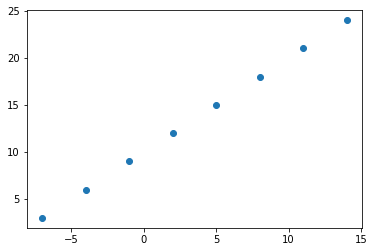

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])   #X is our independent variables

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])   #y is our dependent variable

#Visualize it
plt.scatter(X, y);

In [ ]:
#Think about  it: What's the relationship btwn X and y?
#How can we use X to get y?
# y = x+10

In [ ]:
#X+10
y == X + 10   #this is the relationship for our neural network to learn. This is the relationship btwn X and y

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#What are our input and output shapes
#In the houses example the input shape was 3 (number of bedrooms, # of bathrooms, # of garages) and the output shape was 1 (the predicted price)

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bed', 'bathrooms', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bed', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
#How can we use X to predict y?
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#We want to use X[0] to predict y[0]
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]   #Keep in mind that we're going to use one X value to predict one y value

(-4.0, 6.0)

In [ ]:
# Let's turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape   #let's check the shape now that they're in tensor form
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

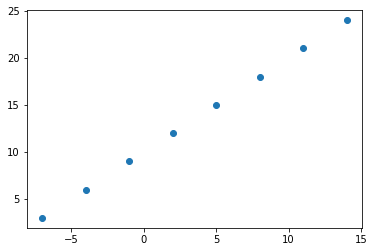

In [ ]:
#How might we build a model to predict the relationships here?
plt.scatter(X,y)

In [ ]:
#Steps in modelling with TF

# Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
# Compiling a model - define the loss function (in other words the function that tells our model how wrong it is)
# The optimizer (tells our model how to improve the patterns it's learning) and evaluation metricts (what we can use to interpret the performance of our model).
# Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed

tf.random.set_seed(42)   #Set the seed so that we have reproducibility  (?)

# Create a model using the Seuqnetial API

#This is telling tensorflow 'I want to create a model and I want you to sequentially go through the following 
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)      #We put one here b/c we put in 1 number and to predict one number
])      

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,   #mae = mean absolute error = calculated 'on average how wrong are our predictions'
             optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent - stochastic means random - an optimizer tells our neural network how it should improve
             metrics= ['mae'])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 557ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
model.predict([17.0])   #Our model predicts that if we have an X value of 17, our y value would be 12.7
#That's pretty far off, but as we can see in line 15 above, that actually makes sense b/c our model's predictions are about 11 points off

array([[12.716021]], dtype=float32)

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

Improve our model

In [ ]:
#We can improve our model, by altering the steps we took to create a model

#What might we be able to do to improve our model?
# 1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, or change the activation function of each layer
# 2. Compile - here we might change the optimization functions or perhaps the learning rate of said optimization functions
# 3. Fitting a model - here we might fit a model for more 'epochs' (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#Let's rebuild our model

# Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 258ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#We tried to make a prediction - what value should follow the 14 at the end (it should be 17 based on the other values of X and y)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])    #if we put 17 in the first array, we should get 27 in the bottom one

####It is much closer now. - by tweaking on single parameter
#It was 12.7
#Now it's 29.9

#In both cases it was supposed to be 27


array([[29.739855]], dtype=float32)

In [ ]:
#Let's rebuild our model again

#Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),   #Keep in mind that your learning rate (lr) is potentially the most important hyperparameter that you can change
              metrics = ['mae'])

# 3. Fit the model
model.fit(X, y, epochs = 100)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 402ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss:

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0]) 

array([[26.58353]], dtype=float32)

In [ ]:
### Evaluation a model


#In practice, a typical workflow you'll go through when building a neural network is:
#Built a model -> fit it -> evaluate it -> tweak it --> fit it --> evaluate it --> tweak it --> fit it -> evaluate it...'''

#The tyings that you can alter, such as tf.keras.layers.Dense() and 'Adam' are called hyperparameters b/c you can adjust them


In [ ]:
#Make a bigger dataset
X = tf. range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

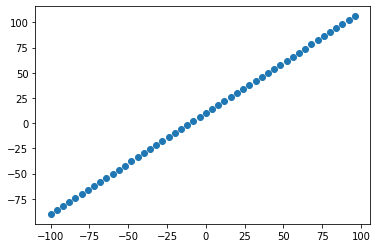

In [ ]:
#So it's a good idea to visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
#Split X and y into an 80 training and 20% test set

In [ ]:
###Usually you'll have three sets

#Training set - maybe 70-80% of the total data you have available.
#Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.  (this set is sometimes valuable)
#Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data avail


In [ ]:
#Example of three datasets

#If you're studying at university

#1. Course materials - training set
#2. Practice exam - validation set
#3. Final exam - test set

#Generalization - the ability for a machine learning model to perform well on data that it hasn't seen before

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets  (well skip validation b/c 50 is a small set)
X_train = X[:40] # First 40 are training samples(80% of the data )
y_train = y[:40]

X_test = X[40:] #the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

It's a good idea to visualize our data

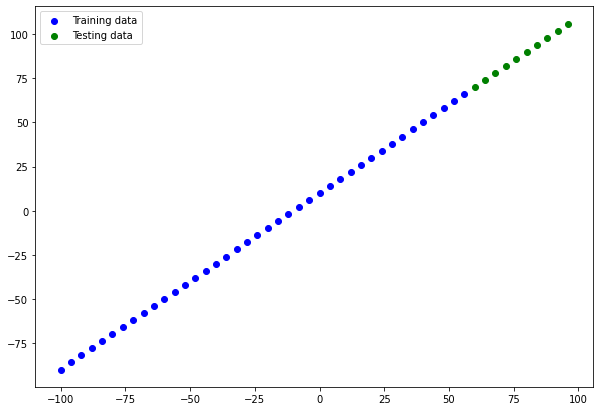

In [ ]:
#Now we've got our data in training and test sets...let's visualize it again!
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')  #c='b' for blue. Our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data') #We want our model to be able to predict this
#Show a legend
plt.legend()  #shows the legend in the upper left so that we don't get our training and test data confused

In [ ]:
#Right now we have a training set which is the blue
#and a testing set which is the green

In [ ]:
#What we want to do next is build a neural network to learn the relationship between X and y
#We then want our model to predict the test data

In [ ]:
#Let's look at how to create a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
                        tf.keras.layers.Dense(1, input_shape=[1])       
                             ])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),   #Keep in mind that your learning rate (lr) is potentially the most important hyperparameter that you can change
              metrics = ['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100)   #we want to fit on the training data only (the blue line)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5273 - mae: 10.5273
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3906 - mae: 9.3906
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6292 - mae: 7.6292
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6859 - mae: 9.6859
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0740 - mae: 11.0740
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2264 - mae: 10.2264
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2347 - mae: 9.2347
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1547 - mae: 9.1547
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7875 - mae: 11.7875
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7172 - mae: 13.7172
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - lo

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Total parameters is how many patterns our model is going to try to learn
#Trainable parameters - there are the parameters (patterns)
#Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learned patterns or parameters from other models during transfer learning )

In [ ]:
#Resource: For more in-depth overview check out MIT introduction to deep learning video: https://www.youtube.com/watch?v=5tvmMX8r_OM

#Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them again the ground truth labels

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth vs your model)'

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[56.60357 ],
       [60.289223],
       [63.974876],
       [67.66053 ],
       [71.34618 ],
       [75.03184 ],
       [78.7175  ],
       [82.40315 ],
       [86.088806],
       [89.77446 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#If you feel like you're going to reuse some kind of functionility in the future, it's a good idea to turn it into a function

In [ ]:
# Make predictions
y_preds = model.predict(X_test)


# View the predictions
y_preds

array([[56.60357 ],
       [60.289223],
       [63.974876],
       [67.66053 ],
       [71.34618 ],
       [75.03184 ],
       [78.7175  ],
       [82.40315 ],
       [86.088806],
       [89.77446 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


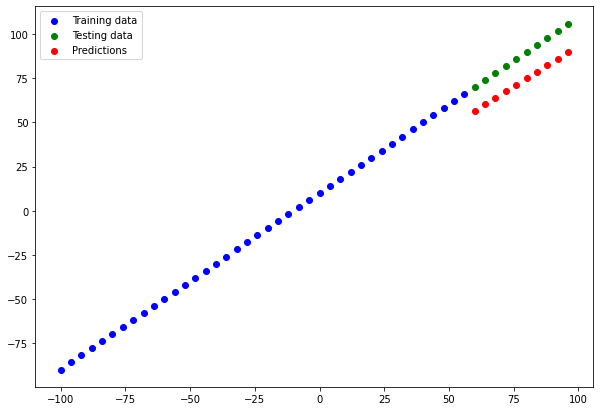

In [ ]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
### Evaluating our model's predictions with regression evaluation metrics

#Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

#Since we're working on a regression, two of the main metrics:
#MAE - mean absolute error: 'on average, how wrong is each of my models predictions' - MAE is very easy to understand
#MSE - mean square error, 'square the average errors' - very similar to MAE but squared - Use this one when larger errors are more significant then smaller errors

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 14.8110 - mae: 14.8110


[14.810986518859863, 14.810986518859863]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)   #(what's the y_true= and y_pred= do?)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.39643 , 27.71078 , 24.025124, 20.33947 , 16.923054, 14.180898,
       12.113001, 10.71937 , 10.      , 10.      ], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)  #this gets rid of the second number in the shape so that they are the same shape

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56.60357 , 60.289223, 63.974876, 67.66053 , 71.34618 , 75.03184 ,
       78.7175  , 82.40315 , 86.088806, 89.77446 ], dtype=float32)>

In [ ]:
#Now calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))  #squeeze our predictions so that they are the same shape
mae #We get the same result as our evaluate function a few lines above

<tf.Tensor: shape=(), dtype=float32, numpy=14.8109865>

In [ ]:
#Next calculate the mean square error(MSE)
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))   #How do we know to when to use tf.squeeze?

mse

<tf.Tensor: shape=(), dtype=float32, numpy=220.18051>

In [ ]:
# functionize mae and mse to make it easy to reuse later

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred)
                                        )
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

In [ ]:
### Running experiments to improve our model

#What are the top three ways to improve our model?
#1. Get more data - get more examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
#2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
#3. Train for longer - give your model more of a chance to find patterns in the data.

In [ ]:
X_train, y_train
#let's make our model better by 'making it larger(more complex model) AND training for longer


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Let's do 3 modelling experiments
#1. model_1 - same as the original model, 1 layer, trained for 100 epochs.
#2. model_2 - 2 layers, trained for 100 epochs
#3. model_3 - 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
                )

#3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

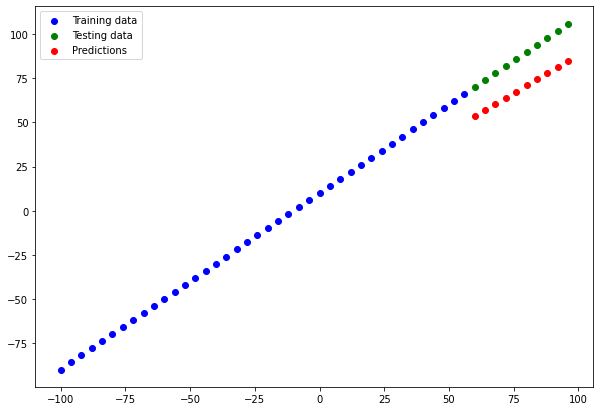

In [ ]:
#What would a scientist do next?
#They would track their results

#Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test) #We're going to make predictions on the test data because our model has never seen the test data and we're interest in how our model will perform on data it's never seen before
plot_predictions(predictions=y_preds_1)  #y_preds_1 b/c we just created that

In [ ]:
#Our model didn't do so well. Ideally the green and red would overlap

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1)) #We got to squeeze these variables to get them into the same shape
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

#The line is 18.74 from where they should be
#if we square them then the error is even larger (3.53.57)

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
#Let's change our mae and mse functions to automatically squeeze our functions
#We went up to line 56 and added tf.squeeze() to make our functions better

In [ ]:
#Build model 2

#2 dense layers, trained for 100 epochs

# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse']   #evaluate it with mse this time while you're training
                )

#3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 7.4494 - mse: 78.2639
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2391 - mse: 117.2352
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6116 - mse: 124.4441
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7602 - mse: 104.9770
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7251 - mse: 107.3715
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9002 - mse: 85.4333
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0002 - mse: 77.7548
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 8.1138 - mse: 70.7955
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0986 - mse: 559.1677
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3698 - mse: 105.9799
Epoch 11/100
2/2 [==============================] - 0s 4ms/ste

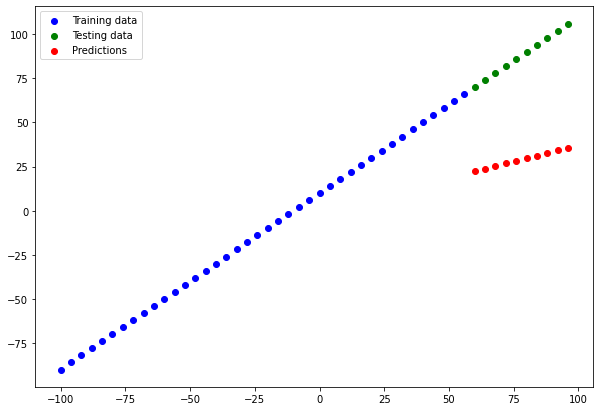

In [ ]:
y_preds_2 = model_2.predict(X_test) #We're going to make predictions on the test data because our model has never seen the test data and we're interest in how our model will perform on data it's never seen before
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, (y_preds_2)) #We got to squeeze these variables to get them into the same shape
mse_2 = mse(y_test, (y_preds_2))  #compare y_test with our predictions from the second model
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=59.02484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3536.0774>)

In [ ]:
#Build model_3

#2 layers, trained for 500 epochs

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms

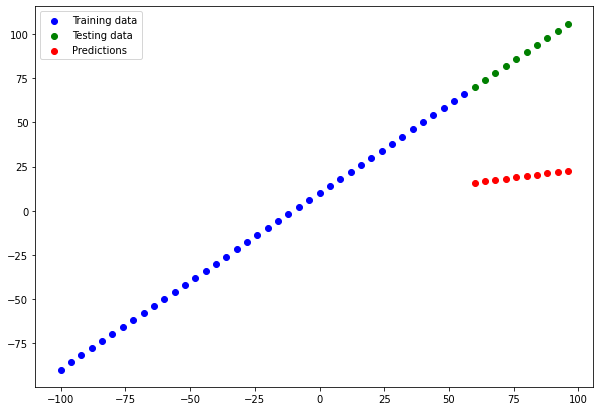

In [ ]:
#y_preds_1 = model_1.predict(X_test) #We're going to make predictions on the test data because our model has never seen the test data and we're interest in how our model will perform on data it's never seen before
#plot_predictions(predictions=y_preds_1)


y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)  #Review

In [ ]:
#Our model did a horrible job here. This is an example of 'overfitting' or training to long
#https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_2)
mse_3 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=59.02484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3536.0774>)

In [ ]:
#instead of having to scroll back and forth to compare our models let's put them here in a more structured manner
#Comparing the results of our experiements
#We've run a few experiments now, let's compare the results - which worked and which didn't

In [ ]:
#Let's compare our results by using a pandas df (which is just a table)
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],   #try it without .numpy() and you'll see what it looks like
                 ['model_2', mae_2.numpy(), mse_2.numpy()],   #much more readable with .numpy
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['models', 'mae', 'mse'])
all_results

,models,mae,mse
0,model_1,18.745327,353.573364
1,model_2,59.024841,3536.077393
2,model_3,59.024841,3536.077393


In [ ]:
#It looks like model_2 performed the best
#What was our model 2?

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#One of your main goals should be to minimize the time between your experiements. The more experiments you do the more things you'll figure out which don't work and in turn, you'll get closer to figuring our what does work. 'Experiment', 'experiement', 'experiment. Start with small experiements

In [ ]:
#Model 2 is performing the best so far. How can we save it so that we can use it somewhere else?

#There are two main formats we can save our model's too:
#1. The SavedModel format is the default - allows you to resume training exactly where you left off.
#2. the HDF5 format


In [ ]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format')   #as a parameter 'just give it a name'


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
model_2.save('best_model_HDF5_format.h5')

In [ ]:
#What's the easiest way to check if we saved our files correctly?
#It's by loading them in

Loading in a saved model

In [ ]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')   #click 'copy path' SavedModel folder in folders on left. Turn into a string
loaded_SavedModel_format.summary()   #You can use something like .summary to make sure that it works

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format   #Check for equality

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
#Why are they not the same? Why evaluating to false. Investigate

In [ ]:
model_2_preds, loaded_SavedModel_format_preds

(array([[22.288586],
        [23.774488],
        [25.260393],
        [26.7463  ],
        [28.232204],
        [29.718111],
        [31.204018],
        [32.68992 ],
        [34.175823],
        [35.66173 ]], dtype=float32), array([[22.288586],
        [23.774488],
        [25.260393],
        [26.7463  ],
        [28.232204],
        [29.718111],
        [31.204018],
        [32.68992 ],
        [34.175823],
        [35.66173 ]], dtype=float32))

In [ ]:
#They look the same. We'll have to compare another way

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
#evaluate to True. They have the same error.
#Maybe they evaluated to false above because of how the computer stores numbers

In [ ]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([22.288586, 23.774488, 25.260393, 26.7463  , 28.232204, 29.718111,
       31.204018, 32.68992 , 34.175823, 35.66173 ], dtype=float32)

In [ ]:
#The error occured b/c of a simple typo. 
#We should have typed:
# model_2_preds == loaded_SavedModel_format_preds
#We forgot the second preds!

In [ ]:
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#How might we download a model (or any other file) from Google Colab

#If you want to download your files from Google Colab:

#1. You can go to the 'files' tab and right click on the file you're after and click 'download'

#2. Use code (see the cell below).

#3. Save it to Google Drive by connecting Google Drive and copying it there.

In [ ]:
#Download a file from Google Colab

from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from Google Colab to Google Drives (requires mounting Google Drive)
#!cp /content/best_model_HDF5_format.h5 /content/tensorflow_course... #!cp = copy

In [ ]:
# !ls /content/drive/MyDrive/tensorflow_course

A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#What is our dependent variable?    Our dependent variable is our charges - that's what we're trying to predict

In [ ]:
#What are our independent variables (aka features) - sex, age, region, smoker, bmi...

In [ ]:
#some of our features are objects (such as sex/male/female, region, etc) - we want to turn these into numbers - numerical encoding

In [ ]:
#How can we do this?
#Let's use 'one hot encoding' to turn male/female into numbers

In [ ]:
#Google how to one hot encode a pandas dataframe - it recommends 'get dummies'

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)   #on line 99 we called our df insurance
# we save pd.get_dummies(insurance) to the variable insurance_one_hot
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)  #what are our features? Basically every column except for our features
#What is axis=1 stand for???
y = insurance_one_hot['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Right now X and y are in pandas data frames. Our neural network will automatically convert them into formats capable of being used in our neural networks

In [ ]:
#Create training and test sets
#X[:40]  previously we did it like this

#This time we're going to use a very popular function to do it
from sklearn.model_selection import train_test_split    #This is very popular and useful
#It splits arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #This comes directly from here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [ ]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Our test dataset has 20% of the sample
0.2*1338

267.6

In [ ]:
#2. Build a neural network that will take in X_train and y_train and learn the relationships between the 2

In [ ]:
#It's sort of like model_2 above
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Just like model 2 above

tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),                     
                  tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss='mae', optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae']
                        )

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
#We can see in the cell above that it's performing even better on the test dataset than the training dataset. Training loss = 7106. Test loss = 7023

In [ ]:
#mae is tell us that on average our model is wrong by about 7,000. 
#Is that number large?
#Take a look at y_train to compare
y_train.median(), y_train.mean()   #This shows (in the cell below, that our model is substantially wrong b/c the average insurance cost is 13,346 and our model is off by > 7,000

(9575.4421, 13346.089736364489)

In [ ]:
#Right now our model isn't performing well. Let's try to improve it!

In [ ]:
#insurance_model_2

#tf.random.set_seed(42)

#Create model_2

#insurance_model_2 = tf.keras.Sequential(
#    [
#        tf.keras.layers.Dense(1),
#        tf.keras.layers.Dense(10),
#        tf.keras.layers.Dense(2),
#    ]
#)
#2. Compile the model
#insurance_model_2.compile(loss='mae',
#                          optimizer=tf.keras.optimizers.Adam(),
#                          metrics=['mae']
#                          )

#3. Fit the model
#insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
#insurance_model_2.evaluate(X_test, y_test)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#https://keras.io/api/callbacks/early_stopping/

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)

In [ ]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
#Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

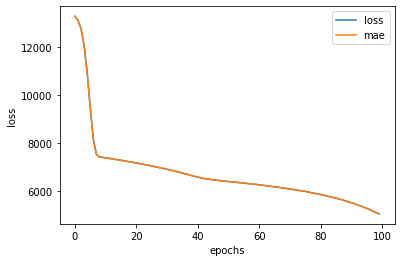

In [ ]:

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
#the loss is still decreasing - but not as dramatically

In [ ]:
#How long should you train for?
#It depends - it depends on the problem you're working on.
###Tensorflow has a solution! It's call the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain amount

In [ ]:
#Preprocessing (normalization and standardization) - what can we do to improve the preprocessing of our data?
#Let's go back to step #1 - getting our data ready (to make it better)

In [ ]:
#What is Normalization?
#Normalization in machine learning is part of data preparation for ML.
#The goal of normalization is to change the values of numeric colums in the dataset to a common scale, without distoring difference in the ranges of values

In [ ]:
X.head()   #we can see that age and BMI are on different scales

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


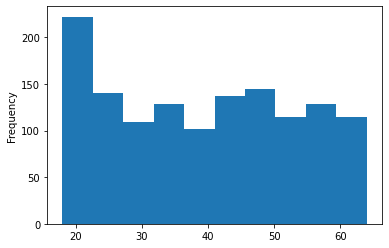

In [ ]:
X['age'].plot(kind='hist')


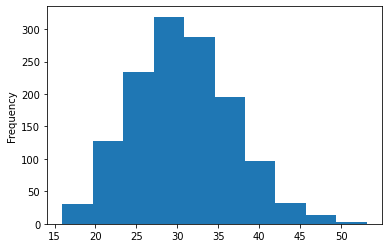

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
#We can see that age goes from 20-60   and 'bmi' goes from 15-50

In [ ]:
X['children'].value_counts()   #a lot of people with 0 children. 18 people with 5 children
#So this histogram would only go from 0-5.
###What if we wanted to get all of them between 0-1?

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
#We can Normalize our data with Scikit-Learn's MinMaxScaler - converts all values to btwn 0-1 whilst preserving the original distribution

In [ ]:
#In terms of scaling values, neural networks tend to prefer normalization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance df
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#To prepare our data, we can borrow a few classes from Scikit-Learn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #turn all values in these columns btwn 0 and 1. How did we know to do this? B/c age, bmi, children are the numberical columns. We don't need to scale our target variable ('charges')
     (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))                                     
                        
#for the nonnumerical columns (sex, smoker, region) we know that we will one hot encode these           
#handle_unknown='ignore' means that if there's any column that OneHotEncoder doesn't know about...just ignore them
#as we pass our data through the above it's going to get MixMaxScaled on age, bmi, and children and OneHotEncoded on sex, smoker and region

#Create X and y - turn our data into features and labels
X = insurance.drop('charges', axis=1)
y = insurance['charges']   #The thing that we're trying to predict goes on the y axis

# Build our train and test sets - we split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the column transformer to our training data...don't fit it to our test data because our test data is from the future
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)  #We've normalized our data and one hot encoded it
X_test_normal = ct.transform(X_test)


In [ ]:
#What does our data look like now?
X_train.loc[0]   #Interesting .loc[0] looks at the first person

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#We actually want to look at 
X_train_normal[0]

#In the above cell - that's what we started with

#In the below cell - that's what we have after MinMaxScaler! 0.608 must be the age, 0.107 is the sex

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Let's take a look at the whole thing

X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#It's all in numerical format. Incredible!

In [ ]:
#Let's look at the shape:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#Normalizing it and OneHotEncoding it added some extra columns

Beautiful! I normalized and one hot encoded our data. Now I'll build a neural network model on it and see how it goes

In [146]:
tf.random.set_seed(42)

#Create model

#These numbers below are based on our insurance_model_2 model b/c it was our best performing
insurance_model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(),   #Keep in mind that your learning rate (lr) is potentially the most important hyperparameter that you can change
              metrics = ['mae'])

#here's the difference from our previous models - next line we're doing it on normalized data
insurance_model_4.fit(X_train_normal, y_train, epochs=100 )

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [149]:
#Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test) #We have to evaluate it on the same type of data that it was trained on - so X_test_normal evaluate it on normalized data

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [151]:
#compare it to our best model - insurance_model_2.evaluate...
#We improved from about 5,000 mae to 3,438 mae just by normalizing our data